In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pickle

In [4]:
df = pd.read_csv('news.csv')  # Replace with your dataset path


In [5]:
X = df['text']  # Features (text data)
y = df['label']  # Labels (FAKE or REAL)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)


In [5]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)  # Fit and transform training data
count_test = count_vectorizer.transform(X_test)  # Transform test data


In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform training data
tfidf_test = tfidf_vectorizer.transform(X_test)  # Transform test data


In [7]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)  # Fit the model
pred = nb_classifier.predict(count_test)  # Predict on test data


In [8]:
nb_classifier.fit(tfidf_train, y_train)  # Fit the model
pred = nb_classifier.predict(tfidf_test)  # Predict on test data


In [9]:
score = accuracy_score(y_test, pred)  # Calculate accuracy
print(score)


0.8565279770444764


<Axes: >

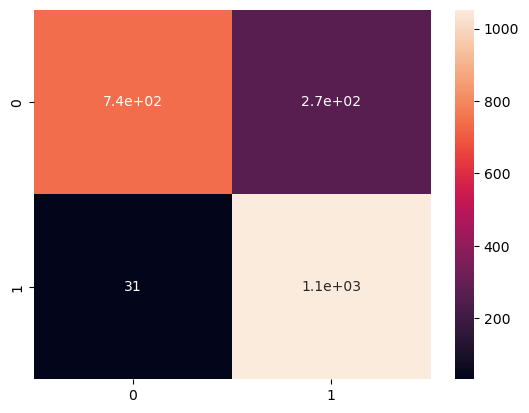

In [10]:
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])  # Confusion matrix
sns.heatmap(cm, annot=True)  # Visualizing the confusion matrix


In [11]:
alphas = np.arange(0, 1, 0.1)
for alpha in alphas:
    nb_classifier = MultinomialNB(alpha=alpha)  # Create model with different alpha
    nb_classifier.fit(tfidf_train, y_train)  # Fit the model
    pred = nb_classifier.predict(tfidf_test)  # Predict
    score = accuracy_score(y_test, pred)  # Calculate accuracy
    print('Alpha:', alpha, 'Score:', score)  # Print results


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Alpha: 0.0 Score: 0.6150167384026781
Alpha: 0.1 Score: 0.8976566236250598
Alpha: 0.2 Score: 0.8938307030129125
Alpha: 0.30000000000000004 Score: 0.8900047824007652
Alpha: 0.4 Score: 0.8857006217120995
Alpha: 0.5 Score: 0.8842659014825442
Alpha: 0.6000000000000001 Score: 0.874701099952176
Alpha: 0.7000000000000001 Score: 0.8703969392635102
Alpha: 0.8 Score: 0.8660927785748446
Alpha: 0.9 Score: 0.8589191774270684


In [12]:
with open('fake_news_model.pkl', 'wb') as handle:
    pickle.dump(nb_classifier, handle)  # Save the trained model

with open('vectorizer.pkl', 'wb') as handle:
    pickle.dump(tfidf_vectorizer, handle)  # Save the vectorizer
